<a href="https://colab.research.google.com/github/Achyuth8583/Arrays/blob/main/96.04%25CSProjectfinalmodel_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

DATASET_PATH = "/content/drive/MyDrive/RiceLeafDatasets"

print(os.listdir(DATASET_PATH))

for folder in os.listdir(DATASET_PATH):
    print(folder, ":", len(os.listdir(os.path.join(DATASET_PATH, folder))), "images")


['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)', 'HealthyRiceLeaf']
Nitrogen(N) : 440 images
Phosphorus(P) : 333 images
Potassium(K) : 383 images
HealthyRiceLeaf : 653 images


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout,
    Conv2D, MaxPooling2D, BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [4]:
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 4


In [5]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)


In [6]:
train_gen = datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


Found 1449 images belonging to 4 classes.


In [7]:
val_gen = datagen.flow_from_directory(
    directory=DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 360 images belonging to 4 classes.


In [8]:
print(train_gen.class_indices)


{'HealthyRiceLeaf': 0, 'Nitrogen(N)': 1, 'Phosphorus(P)': 2, 'Potassium(K)': 3}


In [9]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

base_model.trainable = False


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
x = base_model.output

# Custom CNN layers
x = Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = GlobalAveragePooling2D()(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [11]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history1 = model.fit(
    train_gen,
    epochs=25,
    validation_data=val_gen
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 542s 12s/step - accuracy: 0.6314 - loss: 0.9508 - val_accuracy: 0.7361 - val_loss: 1.5960
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.8728 - loss: 0.3204 - val_accuracy: 0.7778 - val_loss: 0.7325
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 276s 6s/step - accuracy: 0.9007 - loss: 0.2905 - val_accuracy: 0.7583 - val_loss: 1.1202
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 271s 6s/step - accuracy: 0.9141 - loss: 0.2361 - val_accuracy: 0.8694 - val_loss: 0.3506
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 275s 6s/step - accuracy: 0.9199 - loss: 0.2209 - val_accuracy: 0.8000 - val_loss: 0.7148
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.9342 - loss: 0.1737 - val_accuracy: 0.8472 - val_loss: 0.4710
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.9378 - loss: 0.1587 - val_accuracy: 0.8944 - val_loss: 0.2735
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.9570 - loss: 0.1458 - val_accuracy: 0.7889 - 

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
# Training dataset path
DATASET_PATH = "/content/drive/MyDrive/RiceLeafDatasets"

# Testing dataset path
TEST_PATH = "/content/drive/MyDrive/TestingDatasets"

IMG_SIZE = 224
BATCH_SIZE = 16
NUM_CLASSES = 4


In [15]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.15,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1449 images belonging to 4 classes.
Found 360 images belonging to 4 classes.


In [16]:
model = load_model("/content/drive/MyDrive/rice_leaf_final_model.h5")
model.summary()  # optional to verify


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 26,852,262 (102.43 MB)

 Trainable params: 5,048,708 (19.26 MB)

 Non-trainable params: 21,803,552 (83.17 MB)

 Optimizer params: 2 (12.00 B)

In [17]:
for layer in model.layers[:-50]:
    layer.trainable = False
for layer in model.layers[-50:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10 # fine-tuning
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.9212 - loss: 0.2526 - val_accuracy: 0.8778 - val_loss: 0.4050
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.9465 - loss: 0.1656 - val_accuracy: 0.9028 - val_loss: 0.2744
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.9673 - loss: 0.0774 - val_accuracy: 0.8917 - val_loss: 0.3019
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.9689 - loss: 0.0836 - val_accuracy: 0.9222 - val_loss: 0.2246
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.9773 - loss: 0.0878 - val_accuracy: 0.9056 - val_loss: 0.3582
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.9730 - loss: 0.0782 - val_accuracy: 0.8861 - val_loss: 0.3129
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.9822 - loss: 0.0543 - val_accuracy: 0.9111 - val_loss: 0.3276
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9852 - loss: 0.0374 - val_accuracy: 0.9167 - v

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix


In [20]:
TEST_PATH = "/content/drive/MyDrive/TestingDatasets"
IMG_SIZE = 224


In [21]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [22]:
test_gen = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 910 images belonging to 4 classes.


In [23]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"✅ Testing Accuracy: {test_accuracy * 100:.2f}%")


910/910 ━━━━━━━━━━━━━━━━━━━━ 232s 255ms/step - accuracy: 0.9836 - loss: 0.0466
✅ Testing Accuracy: 96.04%


In [24]:
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())


910/910 ━━━━━━━━━━━━━━━━━━━━ 157s 169ms/step


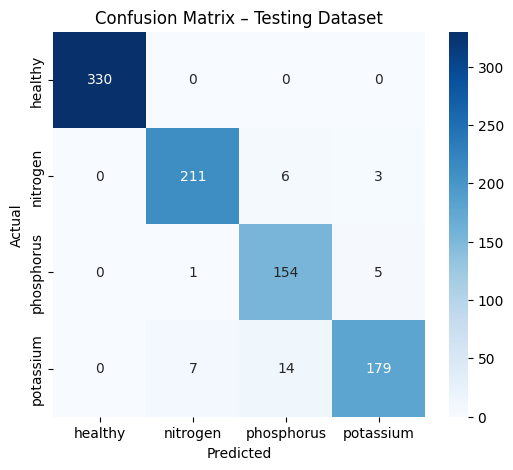

In [25]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Testing Dataset")
plt.show()


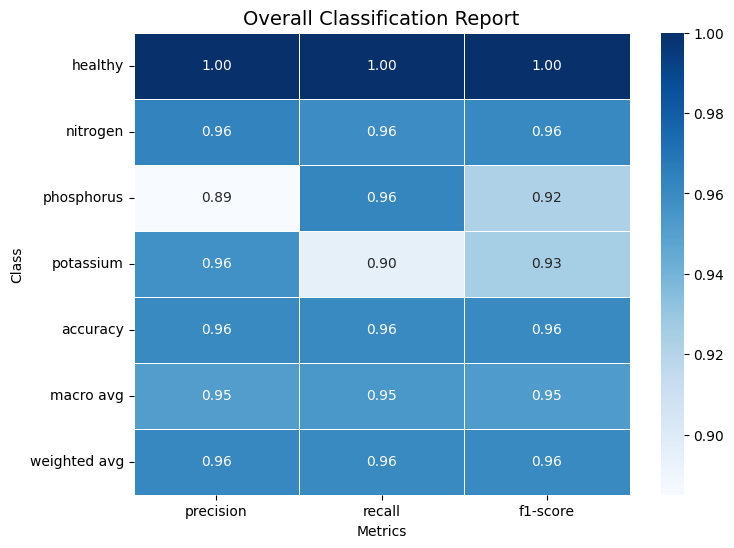

In [26]:
 from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get classification report as dictionary
report = classification_report(
    y_true,
    y_pred,
    target_names=class_names,
    output_dict=True
)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Keep only required columns
report_df = report_df[['precision', 'recall', 'f1-score']]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    report_df,
    annot=True,
    cmap="Blues",     # 🔵 Blue–White color
    fmt=".2f",
    linewidths=0.5,
    cbar=True
)

plt.title("Overall Classification Report", fontsize=14)
plt.ylabel("Class")
plt.xlabel("Metrics")
plt.show()


In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
n_classes = len(class_names)

y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))


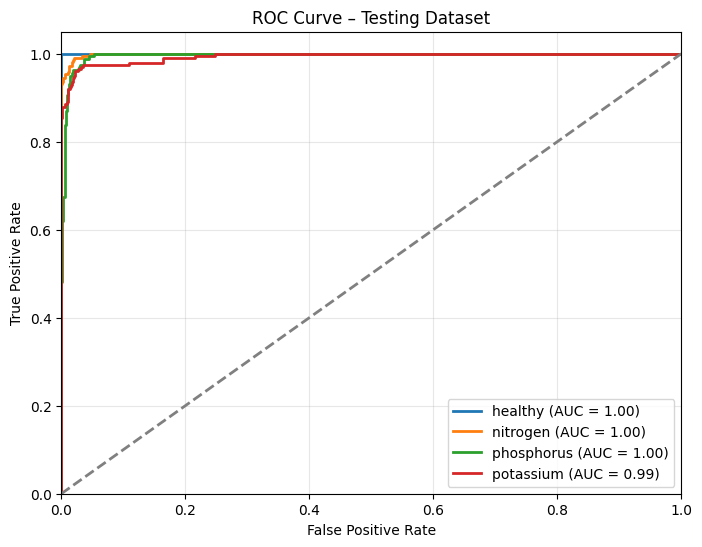

In [30]:
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        lw=2,
        label=f"{class_names[i]} (AUC = {roc_auc:.2f})"
    )

# Diagonal reference line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Testing Dataset")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.show()


In [31]:
results_df = pd.DataFrame({
    "Actual": [class_names[i] for i in y_true],
    "Predicted": [class_names[i] for i in y_pred]
})

results_df.to_csv("/content/drive/MyDrive/testing_results_finetuned.csv", index=False)
print("✅ Testing results saved to Drive")


✅ Testing results saved to Drive
